### homework4：实现以下三种情况的傅里叶反变换，进而比较复原图像的区别，理解傅里叶变换后的幅度谱和相位谱。（第三章）

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#重构
def FTcombine(F,T):
    #幅度谱和相位谱结合
    img = F * np.exp(1j * T)
    img = np.abs(np.fft.ifft2(img))
    img =img/np.max(img)*255
    return img

D:\soft\study\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
D:\soft\study\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


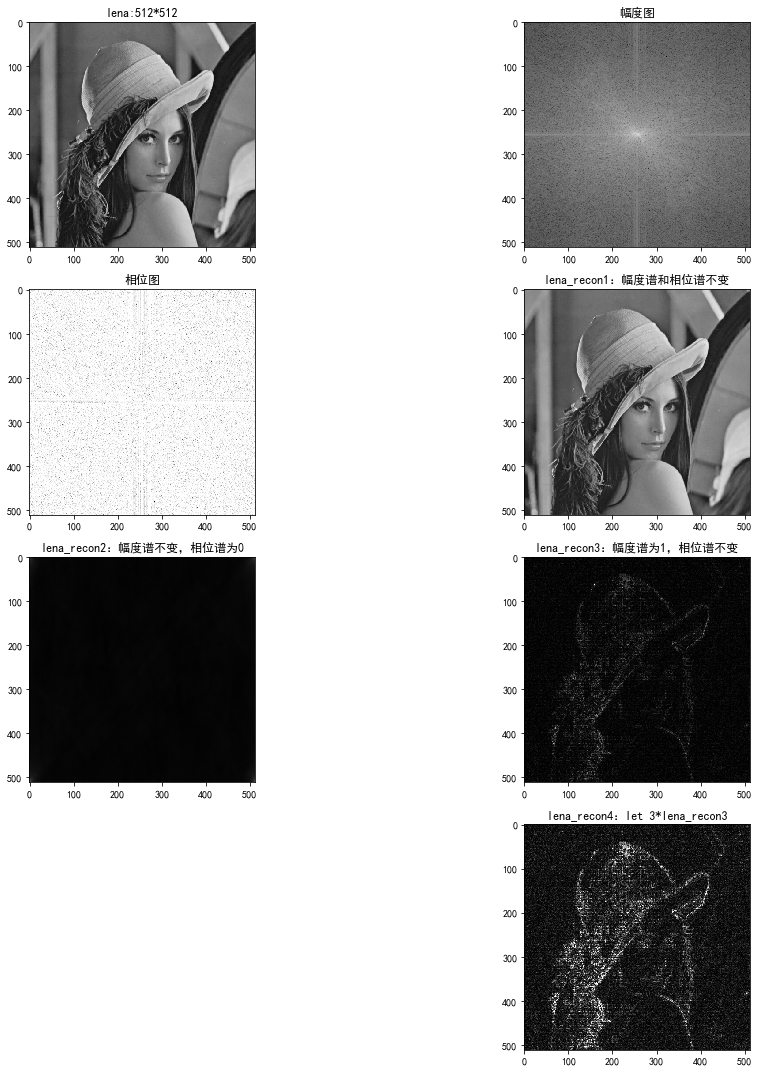

In [4]:
#傅里叶变换
lena=cv2.imread('./lena.jpg',0)
lena_F = np.fft.fft2(lena)
lena_f = np.fft.fftshift(lena_F) #将图像中的低频部分移动到图像的中心
#实现以下三种情况的傅里叶反变换
fd=np.abs(lena_f)#提取幅度谱  sqrt(R^2+I^2)
lena_Fd=np.log(fd) 
xw=np.angle(lena_f)#*180/math.pi#提取相位谱 不是xw=np.arctan(-np.imag(lena_f)/np.real(lena_f))吗
lena_Xw=np.log(xw)
#1.幅度谱和相位谱不变
lena_recon1=FTcombine(fd,xw)  #1j是1虚数
#2.幅度谱不变，相位谱为0
w,h=lena.shape
xw0=np.zeros((w,h))
lena_recon2=FTcombine(fd,xw0)
#3.幅度谱为1，相位谱不变
fd1=np.ones((w,h))
lena_recon3=FTcombine(fd1,xw)
lena_recon3=lena_recon3#cv2.equalizeHist(np.uint8(lena_recon3))
#对lena_recon3增强
lena_recon4=3*lena_recon3

plt.figure(figsize=(15, 15))
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.subplot(421), plt.imshow(lena, 'gray'),plt.title('lena:512*512')
plt.subplot(422), plt.imshow(lena_Fd, 'gray'),plt.title('幅度图')
plt.subplot(423), plt.imshow(lena_Xw, 'gray'),plt.title('相位图')
plt.subplot(424), plt.imshow(lena_recon1, 'gray',vmin=0, vmax=255),plt.title('lena_recon1：幅度谱和相位谱不变')
plt.subplot(425), plt.imshow(lena_recon2, 'gray',vmin=0, vmax=255),plt.title('lena_recon2：幅度谱不变，相位谱为0')
plt.subplot(426), plt.imshow(lena_recon3, 'gray',vmin=0, vmax=255),plt.title('lena_recon3：幅度谱为1，相位谱不变')
plt.subplot(428), plt.imshow(lena_recon4, 'gray',vmin=0, vmax=255),plt.title('lena_recon4：let 3*lena_recon3')
plt.tight_layout()
plt.show()